# Logistic regression

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
x_file = 'data/logisticX.csv'
y_file = 'data/logisticY.csv'

# Read data
X = pandas.read_csv(x_file, header=None).values
Y = np.squeeze(pandas.read_csv(y_file, header=None).values)

### Newton's method

In [6]:
eps = 1e-3

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def newtons(X, Y):

    m = X.shape[0]      # number of training examples
    # append intercept term to X
    Y = np.squeeze(Y)
    X = np.append(np.ones((X.shape[0], 1)), X,  axis=1)
    # initialize theta to zeros
    theta = np.zeros(X.shape[1])

    while True:
        sigm = sigmoid(X @ theta)
        grad = X.T @ (Y - sigm)
        H = - X.T @ np.diag(sigm*(1-sigm)) @ X
        # if not converged, update parameters
        del_theta = np.linalg.inv(H) @ grad
        if (del_theta < eps).all():
            break
        theta = theta - del_theta
    print('theta = {}'.format(theta))
    return theta

theta = [ 0.2232824   1.96257779 -1.96482452]


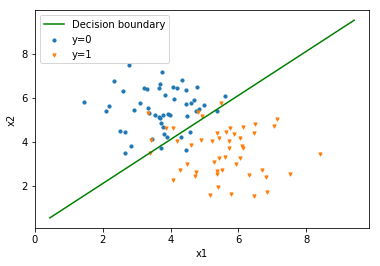

In [7]:
# plot the points
ind0 = np.where(Y == 0)
ind1 = np.where(Y == 1)
plt.scatter(X[ind0, 0], X[ind0, 1], s=10, label='y=0')
plt.scatter(X[ind1, 0], X[ind1, 1], s=10, label='y=1', marker='v')
plt.xlabel('x1')
plt.ylabel('x2')

theta = newtons(X, Y)

# draw the decision boundary
xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
yy = -(theta[0] + theta[1] * xx)/theta[2]
plt.plot(xx, yy, 'g', label='Decision boundary')
plt.legend()
plt.show()